## 2.1. FAST feature series

### 2.1.1. FAST feature

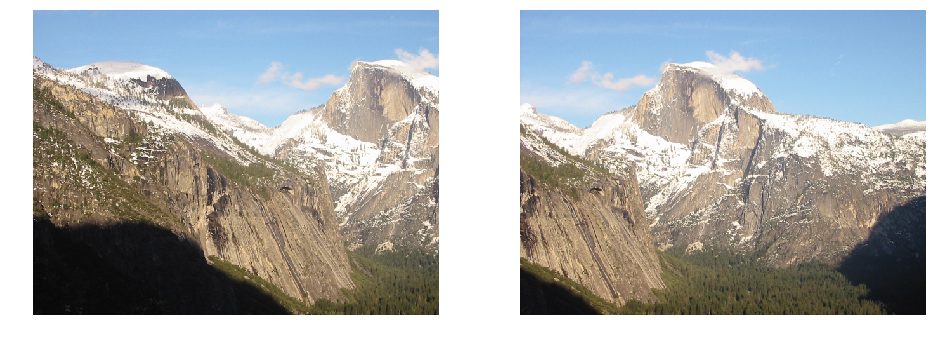

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

images = [cv2.imread('datas/yosemite_test/yosemite1.jpg'), cv2.imread('datas/yosemite_test/yosemite2.jpg')]

fig = plt.figure(figsize=(16, 6))
for i, image in enumerate(images):
    ax = fig.add_subplot(1, 2, i+1)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    _ = ax.axis("off")

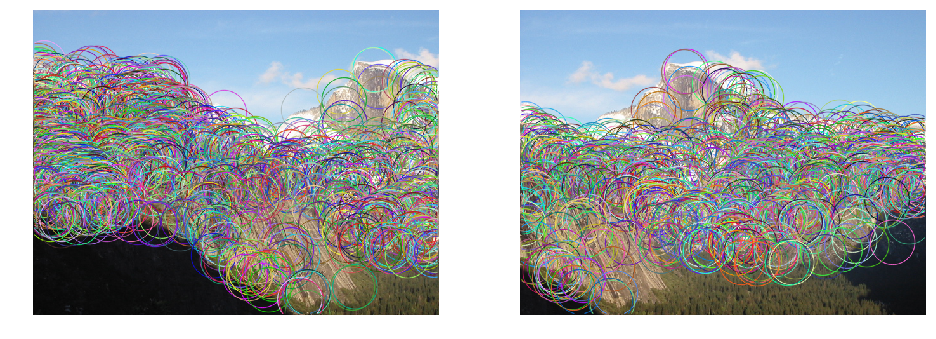

In [2]:
detector = cv2.FastFeatureDetector_create(threshold=60)

fig = plt.figure(figsize=(16, 6))
for i, image in enumerate(images):
    keypoints = detector.detect(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), None)
    for kp in keypoints:
        kp.size *= 10.0

    result = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    ax = fig.add_subplot(1, 2, i+1)
    ax.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    _ = ax.axis("off")

### 2.1.2. ORB feature

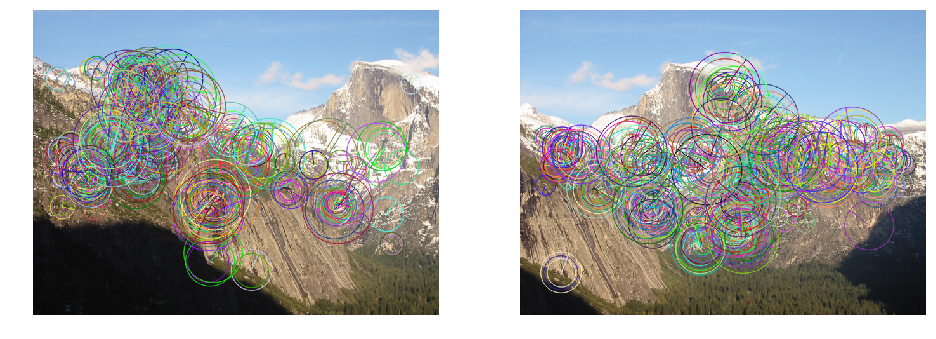

In [3]:
detector = cv2.ORB_create()

fig = plt.figure(figsize=(16, 6))
for i, image in enumerate(images):
    keypoints = detector.detect(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), None)
    
    result = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    ax = fig.add_subplot(1, 2, i+1)
    ax.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    _ = ax.axis("off")

### 2.1.3. ORB feature matching

#images:2 elapsed time: extraction:0.0198sec computation:0.0087sec


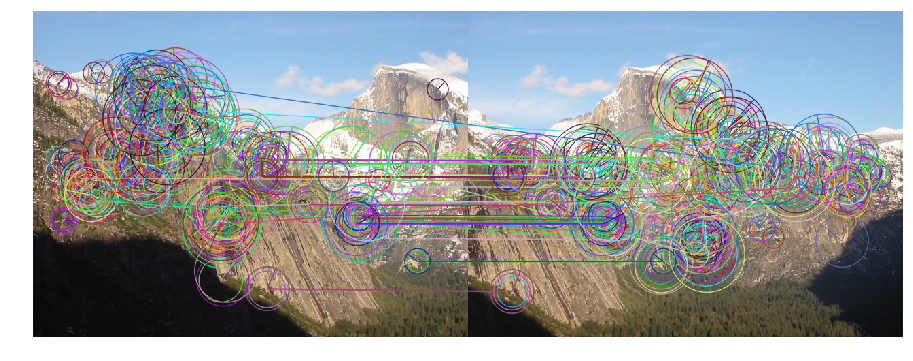

In [4]:
detector = cv2.ORB_create()

timestamps = []
timestamps.append( ('init', time.time()) )
keypoints = [detector.detect(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), None) for image in images]
timestamps.append( ('extraction', time.time()) )
descriptors = [detector.compute(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), kp)[1] for image, kp in zip(images, keypoints)]
timestamps.append( ('computation', time.time()) )

matcher = cv2.BFMatcher()
matches = matcher.knnMatch(descriptors[0], descriptors[1], k=2)

good = []
for m,n in matches:
    if m.distance < 0.80*n.distance:
        good.append([m])
        
result = cv2.drawMatchesKnn(images[0], keypoints[0], images[1], keypoints[1], good, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, ax = plt.subplots(figsize=(16, 6))
ax.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
_ = ax.axis("off")

print('#images:{} elapsed time: {}'.format(
    len(images),
    ' '.join( ['{}:{:.4f}sec'.format(t[0], t[1]-timestamps[i][1]) for i, t in enumerate(timestamps[1:])]) ))

In [5]:
points0 = np.float32([ keypoints[0][m[0].queryIdx].pt for m in good ]).reshape(-1,1,2)
points1 = np.float32([ keypoints[1][m[0].trainIdx].pt for m in good ]).reshape(-1,1,2)

M, mask = cv2.findHomography(points0, points1, cv2.RANSAC,5.0)

print('ratio match results:{}, inliers:{}'.format(len(good), len([idx for idx, m in enumerate(mask) if m])))

ratio match results:52, inliers:42
